<a href="https://colab.research.google.com/github/Md-Sanzid-Bin-Hossain/Future-kinematics-prediction-in-multiple-locomotion-modes-using-deep-learning/blob/main/HICCS_Dataset_B_Kinematics_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install torchviz
# !pip install tsf


import h5py
import json
import matplotlib.pyplot as plt
import numpy as np
import numpy
import statistics
from numpy import loadtxt
import matplotlib.pyplot as plt
import pandas
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statistics import stdev
import math
import h5py

import numpy as np
import time

from scipy.signal import butter,filtfilt
import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
import pandas
import matplotlib.pyplot as plt

# from tsf.model import TransformerForecaster


# from tensorflow.keras.utils import np_utils
import itertools
###  Library for attention layers
import pandas as pd
import os
import numpy as np
#from tqdm import tqdm # Processing time measurement
from sklearn.model_selection import train_test_split

import statistics
import gc
import torch.nn.init as init

############################################################################################################################################################################
############################################################################################################################################################################

import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.utils.weight_norm as weight_norm


import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
from torchsummary import summary
from torch.nn.parameter import Parameter


import torch.optim as optim


from tqdm import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler


from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Data Preparation

In [ ]:
# path='/content/drive/My Drive/Dataset_B_Kinematics/'

# with h5py.File(path+'All_subjects_data_kinematics_datasetB.h5', 'w') as hf:

#     # Create a new group for the columns.
#   All_subject_data = hf.create_group('All_subjects')

#   ID=['id01', 'id02','id03','id04','id05','id07','id08','id10','id12','id13','id14','id15','id16','id17','id18','id19','id22','id23','id24','id25']

# ########################################################################################################################################
#   for Id in ID:

#     id=Id

#     courseA=loadtxt(path+id+'_courseA.csv', delimiter=',')
#     courseB=loadtxt(path+id+'_courseB.csv', delimiter=',')
#     courseC=loadtxt(path+id+'_courseC.csv', delimiter=',')

#     Subject_data = All_subject_data.create_group(id)

#     # Add the columns to the group.
#     Subject_data.create_dataset('courseA', data=courseA)
#     Subject_data.create_dataset('courseB', data=courseB)
#     Subject_data.create_dataset('courseC', data=courseC)


#   hf.close()



# Data Loader

In [ ]:
path='/content/drive/My Drive/Dataset_B_Kinematics/'

def data_loader(id):
  with h5py.File(path+'All_subjects_data_kinematics_datasetB.h5', 'r') as hf:
    All_subjects = hf['All_subjects']
    id = All_subjects[id]

    courseA=id['courseA']
    courseB=id['courseB']
    courseC=id['courseC']

    total_data=np.concatenate((courseA,courseB,courseC),axis=0)

    return np.array(total_data)


In [ ]:
id01_data=data_loader('id01')
gc.collect()
id02_data=data_loader('id02')
gc.collect()
id03_data=data_loader('id03')
gc.collect()
id04_data=data_loader('id04')
gc.collect()
id05_data=data_loader('id05')
gc.collect()
id07_data=data_loader('id07')
gc.collect()
id08_data=data_loader('id08')
gc.collect()
id10_data=data_loader('id10')
gc.collect()
id12_data=data_loader('id12')
gc.collect()
id13_data=data_loader('id13')
gc.collect()
id14_data=data_loader('id14')
gc.collect()
id15_data=data_loader('id15')
gc.collect()
id16_data=data_loader('id16')
gc.collect()
id17_data=data_loader('id17')
gc.collect()
id18_data=data_loader('id18')
gc.collect()
id19_data=data_loader('id19')
gc.collect()
id22_data=data_loader('id22')
gc.collect()
id23_data=data_loader('id23')
gc.collect()
id24_data=data_loader('id24')
gc.collect()
id25_data=data_loader('id25')
gc.collect()

0

In [ ]:
print(id01_data.shape)

(100666, 220)


#Subject Selection

In [ ]:
main_dir = "/content/drive/My Drive/public dataset/Public_dataset_2/Subject01"
# os.mkdir(main_dir)
path="/content/"
subject='Subject_01'
encoder='lstm'

In [ ]:
# train_data=np.concatenate((id02_data,id03_data,id04_data,id05_data,id07_data,id08_data,id10_data,id12_data,id13_data,
#                            id14_data,id15_data,id16_data,id17_data,id18_data,id19_data,id22_data,id23_data,id24_data,id25_data),axis=0)

train_data=np.concatenate((id02_data,id03_data,id04_data,id05_data,id07_data),axis=0)

test_data=id01_data


In [ ]:
print(train_data.shape)

(474002, 220)


In [ ]:
train_dataset_kinematics=train_data[:,154:220]
print(train_dataset_kinematics.shape)

(474002, 66)


# Data processing and preparation
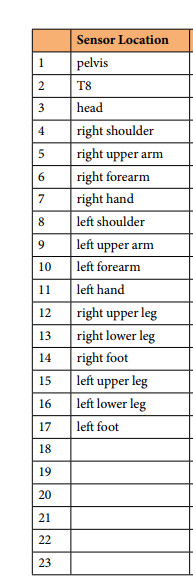

In [ ]:
train_dataset_IMU=np.concatenate((train_data[:,0:12],train_data[:,12:102]),axis=1)
train_dataset_insoles=train_data[:,102:152]
train_dataset_eyetracker=train_data[:,152:154]
train_dataset_kinematics=train_data[:,154:220]

train_dataset_target=np.concatenate((train_dataset_kinematics[:,44:45],train_dataset_kinematics[:,47:48],train_dataset_kinematics[:,50:51],train_dataset_kinematics[:,56:57],
                                     train_dataset_kinematics[:,59:60],train_dataset_kinematics[:,62:63]),axis=1)


test_dataset_IMU=np.concatenate((test_data[:,0:12],test_data[:,12:102]),axis=1)
test_dataset_insoles=test_data[:,102:152]
test_dataset_eyetracker=test_data[:,152:154]
test_dataset_kinematics=test_data[:,154:220]


test_dataset_target=np.concatenate((test_dataset_kinematics[:,44:45],test_dataset_kinematics[:,47:48],test_dataset_kinematics[:,50:51],test_dataset_kinematics[:,56:57],
                                     test_dataset_kinematics[:,59:60],test_dataset_kinematics[:,62:63]),axis=1)


print(train_dataset_IMU.shape)
print(train_dataset_insoles.shape)
print(train_dataset_eyetracker.shape)
print(train_dataset_target.shape)


gc.collect()
gc.collect()
gc.collect()


(474002, 102)
(474002, 50)
(474002, 2)
(474002, 6)


0

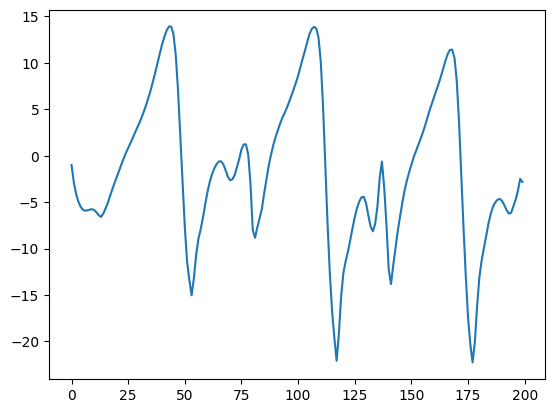

In [ ]:
plt.plot(train_dataset_target[0:200,5])

In [ ]:
# # convert an array of values into a dataset matrix
def create_dataset(dataset_1, window=30):
  dataX= []
  k=0
  shift=6
  for i in range(int(len(dataset_1)/shift-5)):
    j=shift*k
    a = dataset_1[j:j+window,:]
    dataX.append(a)
    k=k+1
  return np.array(dataX)

# # convert an array of values into a dataset matrix
def create_dataset_Kinematics(dataset_1, window=30):
  dataX= []
  k=0
  shift=6
  for i in range(int(len(dataset_1)/shift-5)):
      j=shift*k
      a = dataset_1[j+window:j+window+shift,:]
      dataX.append(a)
      k=k+1
  return np.array(dataX)

In [ ]:
window=30

train_IMU=create_dataset(train_dataset_IMU)
train_insoles=create_dataset(train_dataset_insoles)
train_eyetracker=create_dataset(train_dataset_eyetracker)

train_target_future=create_dataset_Kinematics(train_dataset_target)
train_target_present=create_dataset(train_dataset_target)


gc.collect()
gc.collect()
gc.collect()
gc.collect()


test_IMU=create_dataset(test_dataset_IMU)
test_insoles=create_dataset(test_dataset_insoles)
test_eyetracker=create_dataset(test_dataset_eyetracker)

test_target_future=create_dataset_Kinematics(test_dataset_target)
test_target_present=create_dataset(test_dataset_target)


gc.collect()
gc.collect()
gc.collect()
gc.collect()


0

In [ ]:
print(train_IMU.shape)
print(train_insoles.shape)
print(train_eyetracker.shape)
print(train_target_present.shape)
print(train_target_future.shape)


# print(test_IMU.shape)
# print(test_insoles.shape)
# print(test_eyetracker.shape)
# print(test_target_present.shape)
# print(test_target_future.shape)

(78995, 30, 102)
(78995, 30, 50)
(78995, 30, 2)
(78995, 30, 6)
(78995, 6, 6)


In [ ]:
train_X_IMU, X_validation_IMU,train_X_insoles, X_validation_insoles, train_X_eyetracker, X_validation_eyetracker, train_y_5_present, Y_validation_present , train_y_5_future, Y_validation_future=train_test_split(train_IMU,train_insoles,train_eyetracker, train_target_present, train_target_future,test_size=0.20, random_state=True)

In [ ]:
print()

In [ ]:

### Data Processing

batch_size = 64

## all Modality Train Features and target

train_features = torch.Tensor(train_X_IMU)
train_features_insoles = torch.Tensor(train_X_insoles)
train_features_eyetracker= torch.Tensor(train_X_eyetracker)


train_targets_present = torch.Tensor(train_y_5_present)
train_targets_future= torch.Tensor(train_y_5_future)

## all Modality val Features and target

val_features = torch.Tensor(X_validation_IMU)
val_features_insoles = torch.Tensor(X_validation_insoles)
val_features_eyetracker = torch.Tensor(X_validation_eyetracker)

val_targets_present = torch.Tensor(Y_validation_present)
val_targets_future = torch.Tensor(Y_validation_future)

## all Modality test Features and target

test_features = torch.Tensor(test_IMU)
test_features_insoles = torch.Tensor(test_insoles)
test_features_eyetracker = torch.Tensor(test_eyetracker)

test_targets_present = torch.Tensor(test_target_present)
test_targets_future = torch.Tensor(test_target_future)




train_features_acc_8=torch.cat((train_features[:,:,0:3],train_features[:,:,6:9],train_features[:,:,12:15],train_features[:,:,18:21],train_features[:,:,24:27]\
                             ,train_features[:,:,30:33],train_features[:,:,36:39],train_features[:,:,42:45],train_features[:,:,48:51],train_features[:,:,54:57]
                             ,train_features[:,:,60:63],train_features[:,:,66:69],train_features[:,:,72:75],train_features[:,:,78:81],train_features[:,:,84:87]
                             ,train_features[:,:,90:93],train_features[:,:,96:99]),axis=-1)

test_features_acc_8=torch.cat((test_features[:,:,0:3],test_features[:,:,6:9],test_features[:,:,12:15],test_features[:,:,18:21],test_features[:,:,24:27]\
                             ,test_features[:,:,30:33],test_features[:,:,36:39],test_features[:,:,42:45],test_features[:,:,48:51],test_features[:,:,54:57]
                             ,test_features[:,:,60:63],test_features[:,:,66:69],test_features[:,:,72:75],test_features[:,:,78:81],test_features[:,:,84:87]
                             ,test_features[:,:,90:93],test_features[:,:,96:99]),axis=-1)

val_features_acc_8=torch.cat((val_features[:,:,0:3],val_features[:,:,6:9],val_features[:,:,12:15],val_features[:,:,18:21],val_features[:,:,24:27]\
                             ,val_features[:,:,30:33],val_features[:,:,36:39],val_features[:,:,42:45],val_features[:,:,48:51],val_features[:,:,54:57]
                             ,val_features[:,:,60:63],val_features[:,:,66:69],val_features[:,:,72:75],val_features[:,:,78:81],val_features[:,:,84:87]
                             ,val_features[:,:,90:93],val_features[:,:,96:99]),axis=-1)

train_features_gyr_8=torch.cat((train_features[:,:,3:6],train_features[:,:,9:12],train_features[:,:,15:18],train_features[:,:,21:24],train_features[:,:,27:30]\
                             ,train_features[:,:,33:36],train_features[:,:,39:42],train_features[:,:,45:48],train_features[:,:,51:54],train_features[:,:,57:60]
                             ,train_features[:,:,63:66],train_features[:,:,69:72],train_features[:,:,75:78],train_features[:,:,81:84],train_features[:,:,87:90]
                             ,train_features[:,:,93:96],train_features[:,:,99:102]),axis=-1)


test_features_gyr_8=torch.cat((test_features[:,:,3:6],test_features[:,:,9:12],test_features[:,:,15:18],test_features[:,:,21:24],test_features[:,:,27:30]\
                             ,test_features[:,:,33:36],test_features[:,:,39:42],test_features[:,:,45:48],test_features[:,:,51:54],test_features[:,:,57:60]
                             ,test_features[:,:,63:66],test_features[:,:,69:72],test_features[:,:,75:78],test_features[:,:,81:84],test_features[:,:,87:90]
                             ,test_features[:,:,93:96],test_features[:,:,99:102]),axis=-1)

val_features_gyr_8=torch.cat((val_features[:,:,3:6],val_features[:,:,9:12],val_features[:,:,15:18],val_features[:,:,21:24],val_features[:,:,27:30]\
                             ,val_features[:,:,33:36],val_features[:,:,39:42],val_features[:,:,45:48],val_features[:,:,51:54],val_features[:,:,57:60]
                             ,val_features[:,:,63:66],val_features[:,:,69:72],val_features[:,:,75:78],val_features[:,:,81:84],val_features[:,:,87:90]
                             ,val_features[:,:,93:96],val_features[:,:,99:102]),axis=-1)



train = TensorDataset(train_features, train_features_acc_8,train_features_gyr_8,train_features_insoles,train_features_eyetracker, train_targets_present, train_targets_future)
val = TensorDataset(val_features, val_features_acc_8, val_features_gyr_8, val_features_insoles, val_features_eyetracker,val_targets_present, val_targets_future)
test = TensorDataset(test_features, test_features_acc_8, test_features_gyr_8, test_features_insoles, test_features_eyetracker, test_targets_present, test_targets_future)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

# Important Function

In [ ]:
import scipy.stats as stats

def RMSE_prediction(yhat_4,test_y):

  s1=yhat_4.shape[0]*yhat_4.shape[1]

  test_o=test_y.reshape((s1,6))
  yhat=yhat_4.reshape((s1,6))


  y_1_no=yhat[:,0]
  y_2_no=yhat[:,1]
  y_3_no=yhat[:,2]
  y_4_no=yhat[:,3]
  y_5_no=yhat[:,4]
  y_6_no=yhat[:,5]


  y_1=y_1_no
  y_2=y_2_no
  y_3=y_3_no
  y_4=y_4_no
  y_5=y_5_no
  y_6=y_6_no


  y_test_1=test_o[:,0]
  y_test_2=test_o[:,1]
  y_test_3=test_o[:,2]
  y_test_4=test_o[:,3]
  y_test_5=test_o[:,4]
  y_test_6=test_o[:,5]


  ###calculate RMSE

  rmse_1 =np.sqrt(mean_squared_error(y_test_1,y_1))
  rmse_2 =np.sqrt(mean_squared_error(y_test_2,y_2))
  rmse_3 =np.sqrt(mean_squared_error(y_test_3,y_3))
  rmse_4 =np.sqrt(mean_squared_error(y_test_4,y_4))
  rmse_5 =np.sqrt(mean_squared_error(y_test_5,y_5))
  rmse_6 =np.sqrt(mean_squared_error(y_test_6,y_6))


  print(rmse_1)
  print(rmse_2)
  print(rmse_3)
  print(rmse_4)
  print(rmse_5)
  print(rmse_6)


  p_1=np.corrcoef(y_1, y_test_1)[0, 1]
  p_2=np.corrcoef(y_2, y_test_2)[0, 1]
  p_3=np.corrcoef(y_3, y_test_3)[0, 1]
  p_4=np.corrcoef(y_4, y_test_4)[0, 1]
  p_5=np.corrcoef(y_5, y_test_5)[0, 1]
  p_6=np.corrcoef(y_6, y_test_6)[0, 1]



  print("\n")
  print(p_1)
  print(p_2)
  print(p_3)
  print(p_4)
  print(p_5)
  print(p_6)



              ### Correlation ###
  p=np.array([(p_1+p_4)/2,(p_2+p_5)/2,(p_3+p_6)/2])


      #### Mean and standard deviation ####

  rmse=np.array([(rmse_1+rmse_4)/2,(rmse_2+rmse_5)/2,(rmse_3+rmse_6)/2])

      #### Mean and standard deviation ####
  m=statistics.mean(rmse)
  SD=statistics.stdev(rmse)
  print('Mean: %.3f' % m,'+/- %.3f' %SD)

  m_c=statistics.mean(p)
  SD_c=statistics.stdev(p)
  print('Mean: %.3f' % m_c,'+/- %.3f' %SD_c)



  return rmse, p


In [ ]:
# Define custom RMSE loss function
class RMSELoss(torch.nn.Module):
    def __init__(self):
        super(RMSELoss, self).__init__()

    def forward(self, pred, target):
        mse_loss = torch.nn.MSELoss()(pred, target)
        rmse_loss = torch.sqrt(mse_loss)
        return rmse_loss

In [ ]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [ ]:
import torch.nn as nn
import torch

class PearsonCorrCoefLoss(nn.Module):
    def __init__(self):
        super(PearsonCorrCoefLoss, self).__init__()

    def forward(self, y_pred, y_true):
        x = y_pred - torch.mean(y_pred)
        y = y_true - torch.mean(y_true)
        loss = torch.sum(x * y) / (torch.sqrt(torch.sum(x ** 2)) * torch.sqrt(torch.sum(y ** 2)))
        return 1- loss


# Model Training-- 17 IMUs+ Insoles

## Training Function

In [ ]:
def train_mm_m(train_loader, learn_rate, EPOCHS, model,filename):

    if torch.cuda.is_available():
      model.cuda()
    # Defining loss function and optimizer
    # criterion =nn.MSELoss()
    criterion =RMSELoss()
    # criterion =PearsonCorrCoefLoss()


    # criterion=PearsonCorrLoss()
    # optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

    optimizer = torch.optim.Adam(model.parameters())


    running_loss=0
    # Train the model
    start_time = time.time()

    # Train the model with early stopping
    best_val_loss = float('inf')
    patience = 10


    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        model.train()
        for i, (data, data_acc, data_gyr, data_insoles, data_eyetracker, target_present, target_future) in enumerate(train_loader):
            optimizer.zero_grad()
            output= model(data_acc.to(device).float(),data_gyr.to(device).float(),data_insoles.to(device).float())

            loss = criterion(output, target_future.to(device).float())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss=running_loss/len(train_loader)

       # Validate
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, data_acc, data_gyr, data_insoles, data_eyetracker, target_present, target_future in val_loader:
                output= model(data_acc.to(device).float(),data_gyr.to(device).float(),data_insoles.to(device).float())
                val_loss += criterion(output, target_future.to(device).float())

        val_loss /= len(val_loader)

        epoch_end_time = time.time()
        epoch_training_time = epoch_end_time - epoch_start_time

        torch.set_printoptions(precision=4)

        print(f"Epoch: {epoch+1}, time: {epoch_training_time:.4f}, Training Loss: {train_loss:.4f},  Validation loss: {val_loss:.4f}")

        running_loss=0

        epoch_end_time = time.time()

                # Check if the validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping if the validation loss hasn't improved for `patience` epochs
        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break



    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")


    # # Save the trained model
    # torch.save(model.state_dict(), "model.pth")

    return model

## Attention Without gating+ Bi-LSTM + Bi-GRU --Encoder+decoder

In [ ]:
class Encoder_lstm(nn.Module):
    def __init__(self, input_dim, dropout):
        super(Encoder_lstm, self).__init__()
        self.lstm_1 = nn.LSTM(input_dim, 128, bidirectional=True, batch_first=True, dropout=0.0)
        self.lstm_2 = nn.LSTM(256, 64, bidirectional=True, batch_first=True, dropout=0.0)
        self.dropout=nn.Dropout(dropout)

    def forward(self, x):
        out_1, _ = self.lstm_1(x)
        out_1=self.dropout(out_1)
        out_2, (h_n, c_n) = self.lstm_2(out_1)
        out_2=self.dropout(out_2)

        return out_2, (h_n, c_n)

In [ ]:
class Encoder_gru(nn.Module):
    def __init__(self, input_dim, dropout):
        super(Encoder_gru, self).__init__()
        self.lstm_1 = nn.GRU(input_dim, 128, bidirectional=True, batch_first=True, dropout=0.0)
        self.lstm_2 = nn.GRU(256, 64, bidirectional=True, batch_first=True, dropout=0.0)
        self.dropout=nn.Dropout(dropout)


    def forward(self, x):
        out_1, _ = self.lstm_1(x)
        out_1=self.dropout(out_1)
        out_2, h_n = self.lstm_2(out_1)
        out_2=self.dropout(out_2)

        return out_2, h_n

In [ ]:
class LSTMDecoder(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout):
        super(LSTMDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, bidirectional=True, batch_first=True)
        self.gru = nn.GRU(input_size, hidden_size, num_layers, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(2*2*hidden_size, output_size)
        self.dropout=nn.Dropout(dropout)

        self.gating_net = nn.Sequential(nn.Linear(2*3*128+6, 2*3*128+6),nn.Sigmoid())


    def forward(self, encoder_hidden, encoder_cell, h_gru, h_att_lstm, h_att_gru,  max_len):
        batch_size = encoder_hidden.shape[1]
        hidden = encoder_hidden
        hidden_gru=h_gru
        cell = encoder_cell
        outputs = []

        # Use the last time step of target as the initial input
        input_1 = torch.zeros(batch_size,1,6).to(device)
        input = torch.cat((input_1, h_att_lstm, h_att_gru), dim=-1)


        for i in range(max_len):

            gating_weight=self.gating_net(input)
            input=input*gating_weight

            # Run one time step of LSTM
            output_1, (hidden, cell) = self.lstm(input, (hidden, cell))
            output_2, hidden_gru = self.gru(input, hidden_gru)

            output=torch.cat((output_1,output_2),dim=-1)

            output=self.dropout(output)

            # Use the output for prediction
            output = self.fc(output.squeeze(1))
            outputs.append(output.unsqueeze(1))

            # Use the predicted output as the next input
            input = torch.cat(( output.unsqueeze(1), input[:,:,6:774]), dim=-1)



        # Concatenate all the outputs along the time dimension
        outputs = torch.cat(outputs, dim=1)

        return outputs

In [ ]:
class TemporalAttention(nn.Module):
    def __init__(self, hidden_size):
        super(TemporalAttention, self).__init__()

        self.W = nn.Linear(hidden_size, hidden_size)
        self.V = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # x: (batch_size, sequence_length, hidden_size)

        # Calculate attention weights.
        attn = self.V(torch.tanh(self.W(x)))
        attn = attn.squeeze(-1)
        attn = torch.softmax(attn, dim=1)

        # Calculate weighted average of hidden states.
        context = attn.unsqueeze(-1) * x
        context = context.sum(dim=1)

        return context

In [ ]:
class MM_ED_Bi_LSTM_GRU_WF(nn.Module):
    def __init__(self, input_acc, input_gyr,input_insoles, drop_prob=0.05):
        super(MM_ED_Bi_LSTM_GRU_WF, self).__init__()

        self.encoder_acc_lstm=Encoder_lstm(input_acc, drop_prob)
        self.encoder_gyr_lstm=Encoder_lstm(input_gyr, drop_prob)
        self.encoder_insoles_lstm=Encoder_lstm(input_insoles, drop_prob)

        self.encoder_acc_gru=Encoder_gru(input_acc, drop_prob)
        self.encoder_gyr_gru=Encoder_gru(input_gyr, drop_prob)
        self.encoder_insoles_gru=Encoder_gru(input_insoles, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)
        self.BN_insoles= nn.BatchNorm1d(input_insoles, affine=False)

        self.temporal_attn_acc = TemporalAttention(128)
        self.temporal_attn_gyr = TemporalAttention(128)
        self.temporal_attn_insoles = TemporalAttention(128)


        self.decoder=LSTMDecoder(2*3*128+6, 3*64, 6, 1, 0.05)

    def forward(self, x_acc, x_gyr, x_insoles):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))
        x_insoles_1=x_insoles.view(x_insoles.size(0)*x_insoles.size(1),x_insoles.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)
        x_insoles_1=self.BN_insoles(x_insoles_1)

        x_acc_2=x_acc_1.view(-1, window, x_acc_1.size(-1))
        x_gyr_2=x_gyr_1.view(-1, window, x_gyr_1.size(-1))
        x_insoles_2=x_insoles_1.view(-1, window, x_insoles_1.size(-1))

        x_acc_lstm,(h_acc_lstm, c_acc_lstm)=self.encoder_acc_lstm(x_acc_2)
        x_gyr_lstm,(h_gyr_lstm, c_gyr_lstm)=self.encoder_gyr_lstm(x_gyr_2)
        x_insoles_lstm,(h_insoles_lstm, c_insoles_lstm)=self.encoder_insoles_lstm(x_insoles_2)


        x_acc_gru,h_acc_gru=self.encoder_acc_gru(x_acc_2)
        x_gyr_gru,h_gyr_gru=self.encoder_gyr_gru(x_gyr_2)
        x_insoles_gru,h_insoles_gru=self.encoder_insoles_gru(x_insoles_2)


        h_lstm=torch.cat((h_acc_lstm,h_gyr_lstm,h_insoles_lstm),dim=-1)
        c_lstm=torch.cat((c_acc_lstm,c_gyr_lstm,c_insoles_lstm),dim=-1)

        h_gru=torch.cat((h_acc_gru,h_gyr_gru,h_insoles_gru),dim=-1)


        h_acc_att_lstm=self.temporal_attn_acc(x_acc_lstm)
        h_gyr_att_lstm=self.temporal_attn_gyr(x_gyr_lstm)
        h_insoles_att_lstm=self.temporal_attn_insoles(x_insoles_lstm)


        h_acc_att_gru=self.temporal_attn_acc(x_acc_gru)
        h_gyr_att_gru=self.temporal_attn_gyr(x_gyr_gru)
        h_insoles_att_gru=self.temporal_attn_insoles(x_insoles_gru)


        h_att_lstm=torch.cat((h_acc_att_lstm,h_gyr_att_lstm,h_insoles_att_lstm),dim=-1)
        h_att_gru=torch.cat((h_acc_att_gru,h_gyr_att_gru,h_insoles_att_gru),dim=-1)

        #Do it separately

        h_att_lstm=h_att_lstm.unsqueeze(0)
        h_att_lstm=h_att_lstm.transpose(1,0)

        h_att_gru=h_att_gru.unsqueeze(0)
        h_att_gru=h_att_gru.transpose(1,0)



        out=self.decoder(h_lstm, c_lstm, h_gru, h_att_lstm, h_att_gru, 6)


        return out

In [ ]:
lr = 0.001
model = MM_ED_Bi_LSTM_GRU_WF(51,51,50)

mm_ed_bi_lstm_gru_WF = train_mm_m(train_loader, lr,12,model,path+subject+'_mm_ed_bi_lstm_gru_WF_IMU17_insoles.pth')

Epoch: 1, time: 44.9846, Training Loss: 6.2151,  Validation loss: 3.6076
Epoch: 2, time: 45.6964, Training Loss: 3.1618,  Validation loss: 2.8510
Epoch: 3, time: 45.4461, Training Loss: 2.6096,  Validation loss: 2.5716
Epoch: 4, time: 45.7466, Training Loss: 2.3186,  Validation loss: 2.4054
Training time: 182.05015683174133 seconds


In [ ]:
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
mm_ed_bi_lstm_gru_WF= MM_ED_Bi_LSTM_GRU_WF(51,51,50)
mm_ed_bi_lstm_gru_WF.load_state_dict(torch.load(path+subject+'_mm_ed_bi_lstm_gru_WF_IMU17_insoles.pth'))
mm_ed_bi_lstm_gru_WF.to(device)

mm_ed_bi_lstm_gru_WF.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_insoles,data_eyetracker, target_present, target_future) in enumerate(test_loader):
        output = mm_ed_bi_lstm_gru_WF(data_acc.to(device).float(),data_gyr.to(device).float(),data_insoles.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target_future

        else:

          yhat_5=torch.cat((yhat_5,output),dim=0)
          test_target=torch.cat((test_target,target_future),dim=0)

        # clear memory
        del data, target_future,output
        torch.cuda.empty_cache()



yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p=RMSE_prediction(yhat_4,test_target)

ablation_1=np.hstack([rmse,p])

(16768, 6, 6)
8.11527
8.645963
12.406886
7.660678
11.632217
7.260344


0.9555411614078532
0.9539125147783376
0.7675620999729704
0.9351552744341263
0.9012236751464785
0.8395098271000095
Mean: 9.287 +/- 1.221
Mean: 0.892 +/- 0.077


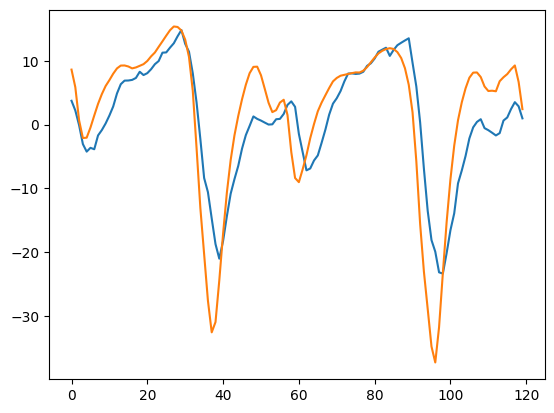

In [ ]:
plt.plot(yhat_4[5:25,:,5].reshape(20*6,1))
plt.plot(test_target[5:25,:,5].reshape(20*6,1))

# Model Training-- 17 IMUs

## Training Function

In [ ]:
def train_mm_m(train_loader, learn_rate, EPOCHS, model,filename):

    if torch.cuda.is_available():
      model.cuda()
    # Defining loss function and optimizer
    # criterion =nn.MSELoss()
    criterion =RMSELoss()
    # criterion =PearsonCorrCoefLoss()

    optimizer = torch.optim.Adam(model.parameters())


    running_loss=0
    # Train the model
    start_time = time.time()

    # Train the model with early stopping
    best_val_loss = float('inf')
    patience = 10


    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        model.train()
        for i, (data, data_acc, data_gyr, data_insoles, data_eyetracker, target_present, target_future) in enumerate(train_loader):
            optimizer.zero_grad()
            output= model(data_acc.to(device).float(),data_gyr.to(device).float())

            loss = criterion(output, target_future.to(device).float())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss=running_loss/len(train_loader)

       # Validate
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, data_acc, data_gyr, data_insoles, data_eyetracker, target_present, target_future in val_loader:
                output= model(data_acc.to(device).float(),data_gyr.to(device).float())
                val_loss += criterion(output, target_future.to(device).float())

        val_loss /= len(val_loader)

        epoch_end_time = time.time()
        epoch_training_time = epoch_end_time - epoch_start_time

        torch.set_printoptions(precision=4)

        print(f"Epoch: {epoch+1}, time: {epoch_training_time:.4f}, Training Loss: {train_loss:.4f},  Validation loss: {val_loss:.4f}")

        running_loss=0

        epoch_end_time = time.time()

                # Check if the validation loss has improved
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), filename)
            patience_counter = 0
        else:
            patience_counter += 1

        # Early stopping if the validation loss hasn't improved for `patience` epochs
        if patience_counter >= patience:
            print(f"Stopping early after {epoch+1} epochs")
            break



    end_time = time.time()

    training_time = end_time - start_time
    print(f"Training time: {training_time} seconds")


    # # Save the trained model
    # torch.save(model.state_dict(), "model.pth")

    return model

## Attention Without gating+ Bi-LSTM + Bi-GRU --Encoder+decoder

In [ ]:
class Encoder_lstm(nn.Module):
    def __init__(self, input_dim, dropout):
        super(Encoder_lstm, self).__init__()
        self.lstm_1 = nn.LSTM(input_dim, 128, bidirectional=True, batch_first=True, dropout=0.0)
        self.lstm_2 = nn.LSTM(256, 64, bidirectional=True, batch_first=True, dropout=0.0)
        self.dropout=nn.Dropout(dropout)

    def forward(self, x):
        out_1, _ = self.lstm_1(x)
        out_1=self.dropout(out_1)
        out_2, (h_n, c_n) = self.lstm_2(out_1)
        out_2=self.dropout(out_2)

        return out_2, (h_n, c_n)

In [ ]:
class Encoder_gru(nn.Module):
    def __init__(self, input_dim, dropout):
        super(Encoder_gru, self).__init__()
        self.lstm_1 = nn.GRU(input_dim, 128, bidirectional=True, batch_first=True, dropout=0.0)
        self.lstm_2 = nn.GRU(256, 64, bidirectional=True, batch_first=True, dropout=0.0)
        self.dropout=nn.Dropout(dropout)


    def forward(self, x):
        out_1, _ = self.lstm_1(x)
        out_1=self.dropout(out_1)
        out_2, h_n = self.lstm_2(out_1)
        out_2=self.dropout(out_2)

        return out_2, h_n

In [ ]:
class LSTMDecoder(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout):
        super(LSTMDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, bidirectional=True, batch_first=True)
        self.gru = nn.GRU(input_size, hidden_size, num_layers, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(2*2*hidden_size, output_size)
        self.dropout=nn.Dropout(dropout)

        self.gating_net = nn.Sequential(nn.Linear(2*2*128+6, 2*2*128+6),nn.Sigmoid())


    def forward(self, encoder_hidden, encoder_cell, h_gru, h_att_lstm, h_att_gru,  max_len):
        batch_size = encoder_hidden.shape[1]
        hidden = encoder_hidden
        hidden_gru=h_gru
        cell = encoder_cell
        outputs = []

        # Use the last time step of target as the initial input
        input_1 = torch.zeros(batch_size,1,6).to(device)
        input = torch.cat((input_1, h_att_lstm, h_att_gru), dim=-1)


        for i in range(max_len):

            gating_weight=self.gating_net(input)
            input=input*gating_weight

            # Run one time step of LSTM
            output_1, (hidden, cell) = self.lstm(input, (hidden, cell))
            output_2, hidden_gru = self.gru(input, hidden_gru)

            output=torch.cat((output_1,output_2),dim=-1)

            output=self.dropout(output)

            # Use the output for prediction
            output = self.fc(output.squeeze(1))
            outputs.append(output.unsqueeze(1))

            # Use the predicted output as the next input
            input = torch.cat(( output.unsqueeze(1), input[:,:,6:518]), dim=-1)



        # Concatenate all the outputs along the time dimension
        outputs = torch.cat(outputs, dim=1)

        return outputs

In [ ]:
class TemporalAttention(nn.Module):
    def __init__(self, hidden_size):
        super(TemporalAttention, self).__init__()

        self.W = nn.Linear(hidden_size, hidden_size)
        self.V = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # x: (batch_size, sequence_length, hidden_size)

        # Calculate attention weights.
        attn = self.V(torch.tanh(self.W(x)))
        attn = attn.squeeze(-1)
        attn = torch.softmax(attn, dim=1)

        # Calculate weighted average of hidden states.
        context = attn.unsqueeze(-1) * x
        context = context.sum(dim=1)

        return context

In [ ]:
class MM_ED_Bi_LSTM_GRU_WF(nn.Module):
    def __init__(self, input_acc, input_gyr, drop_prob=0.05):
        super(MM_ED_Bi_LSTM_GRU_WF, self).__init__()

        self.encoder_acc_lstm=Encoder_lstm(input_acc, drop_prob)
        self.encoder_gyr_lstm=Encoder_lstm(input_gyr, drop_prob)

        self.encoder_acc_gru=Encoder_gru(input_acc, drop_prob)
        self.encoder_gyr_gru=Encoder_gru(input_gyr, drop_prob)

        self.BN_acc= nn.BatchNorm1d(input_acc, affine=False)
        self.BN_gyr= nn.BatchNorm1d(input_gyr, affine=False)

        self.temporal_attn_acc = TemporalAttention(128)
        self.temporal_attn_gyr = TemporalAttention(128)


        self.decoder=LSTMDecoder(2*2*128+6, 2*64, 6, 1, 0.05)

    def forward(self, x_acc, x_gyr):

        x_acc_1=x_acc.view(x_acc.size(0)*x_acc.size(1),x_acc.size(-1))
        x_gyr_1=x_gyr.view(x_gyr.size(0)*x_gyr.size(1),x_gyr.size(-1))

        x_acc_1=self.BN_acc(x_acc_1)
        x_gyr_1=self.BN_gyr(x_gyr_1)

        x_acc_2=x_acc_1.view(-1, window, x_acc_1.size(-1))
        x_gyr_2=x_gyr_1.view(-1, window, x_gyr_1.size(-1))

        x_acc_lstm,(h_acc_lstm, c_acc_lstm)=self.encoder_acc_lstm(x_acc_2)
        x_gyr_lstm,(h_gyr_lstm, c_gyr_lstm)=self.encoder_gyr_lstm(x_gyr_2)


        x_acc_gru,h_acc_gru=self.encoder_acc_gru(x_acc_2)
        x_gyr_gru,h_gyr_gru=self.encoder_gyr_gru(x_gyr_2)


        h_lstm=torch.cat((h_acc_lstm,h_gyr_lstm),dim=-1)
        c_lstm=torch.cat((c_acc_lstm,c_gyr_lstm),dim=-1)

        h_gru=torch.cat((h_acc_gru,h_gyr_gru),dim=-1)


        h_acc_att_lstm=self.temporal_attn_acc(x_acc_lstm)
        h_gyr_att_lstm=self.temporal_attn_gyr(x_gyr_lstm)


        h_acc_att_gru=self.temporal_attn_acc(x_acc_gru)
        h_gyr_att_gru=self.temporal_attn_gyr(x_gyr_gru)


        h_att_lstm=torch.cat((h_acc_att_lstm,h_gyr_att_lstm),dim=-1)
        h_att_gru=torch.cat((h_acc_att_gru,h_gyr_att_gru),dim=-1)

        #Do it separately

        h_att_lstm=h_att_lstm.unsqueeze(0)
        h_att_lstm=h_att_lstm.transpose(1,0)

        h_att_gru=h_att_gru.unsqueeze(0)
        h_att_gru=h_att_gru.transpose(1,0)



        out=self.decoder(h_lstm, c_lstm, h_gru, h_att_lstm, h_att_gru, 6)


        return out

In [ ]:
lr = 0.001
model = MM_ED_Bi_LSTM_GRU_WF(51,51)

mm_ed_bi_lstm_gru_WF = train_mm_m(train_loader, lr,12,model,path+subject+'_mm_ed_bi_lstm_gru_WF_IMU17.pth')

Epoch: 1, time: 27.2556, Training Loss: 8.5747,  Validation loss: 4.4194
Epoch: 2, time: 27.1492, Training Loss: 3.6665,  Validation loss: 3.2503
Epoch: 3, time: 27.3934, Training Loss: 2.9690,  Validation loss: 2.8863
Epoch: 4, time: 27.0657, Training Loss: 2.6184,  Validation loss: 2.6069
Epoch: 5, time: 27.0739, Training Loss: 2.4013,  Validation loss: 2.5334
Epoch: 6, time: 27.1974, Training Loss: 2.2506,  Validation loss: 2.4211
Epoch: 7, time: 27.1601, Training Loss: 2.1244,  Validation loss: 2.3490
Epoch: 8, time: 27.1086, Training Loss: 2.0299,  Validation loss: 2.2799
Epoch: 9, time: 27.1175, Training Loss: 1.9415,  Validation loss: 2.2824
Epoch: 10, time: 27.1112, Training Loss: 1.8817,  Validation loss: 2.1976
Epoch: 11, time: 27.1412, Training Loss: 1.8170,  Validation loss: 2.1989
Epoch: 12, time: 27.1595, Training Loss: 1.7717,  Validation loss: 2.2001
Training time: 326.1627757549286 seconds


In [ ]:
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
mm_ed_bi_lstm_gru_WF= MM_ED_Bi_LSTM_GRU_WF(51,51)
mm_ed_bi_lstm_gru_WF.load_state_dict(torch.load(path+subject+'_mm_ed_bi_lstm_gru_WF_IMU17.pth'))
mm_ed_bi_lstm_gru_WF.to(device)

mm_ed_bi_lstm_gru_WF.eval()

# iterate through batches of test data
with torch.no_grad():
    for i, (data, data_acc, data_gyr, data_hof, data_eyetracker, target_present, target_future) in enumerate(test_loader):
        output = mm_ed_bi_lstm_gru_WF(data_acc.to(device).float(),data_gyr.to(device).float())
        if i==0:
          yhat_5=output
          test_target=target_future

        yhat_5=torch.cat((yhat_5,output),dim=0)
        test_target=torch.cat((test_target,target_future),dim=0)

        # clear memory
        del data, target_future,output
        torch.cuda.empty_cache()



yhat_4 = yhat_5.detach().cpu().numpy()
test_target = test_target.detach().cpu().numpy()
print(yhat_4.shape)

rmse, p=RMSE_prediction(yhat_4,test_target)

ablation_2=np.hstack([rmse,p])

(16832, 6, 6)
6.938661
8.504364
12.905141
6.4119573
9.428121
7.249613


0.9603466740326171
0.9533040610322558
0.7087120964716578
0.9535631573112708
0.937460979632963
0.8492355628150154
Mean: 8.573 +/- 1.735
Mean: 0.894 +/- 0.100
